In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [9]:
df = pd.read_csv("C:/Users/PC1/Downloads/btceUSD_1-min_data_2012-01-01_to_2017-05-31.csv/btceUSD_1-min_data_2012-01-01_to_2017-05-31.csv")
df.head(1000000)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325292180,4.247,4.247,4.247,4.247,0.400000,1.698800,4.247000
1,1325292240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325292300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325292360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325292420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
999995,1385291880,699.970,699.980,697.539,699.980,4.810609,3359.986553,698.453446
999996,1385291940,699.980,699.980,696.502,699.980,9.212176,6441.758808,699.265716
999997,1385292000,699.774,699.774,696.507,697.000,1.069999,745.644999,696.865208
999998,1385292060,697.620,699.778,697.620,699.778,0.247015,172.430472,698.056288


In [10]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.head(10000)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 00:43:00,4.247,4.247,4.247,4.247,0.4,1.6988,4.247
1,2011-12-31 00:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 00:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 00:47:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9995,2012-01-06 23:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,2012-01-06 23:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,2012-01-06 23:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,2012-01-06 23:21:00,6.400,6.400,6.400,6.400,0.4,2.5600,6.400


In [11]:
df.index = df.Timestamp

In [12]:
# Resampling to daily frequency
df = df.resample('D').mean()
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.439149,4.447614,4.437737,4.444623,10.797146,47.337181,4.444100
2012-01-01,5.049322,5.054658,5.043826,5.049161,7.953953,39.796498,5.049446
2012-01-02,5.190137,5.192603,5.184397,5.186099,3.208246,16.609636,5.188622
2012-01-03,4.938149,4.943091,4.934802,4.940562,7.794346,37.942367,4.940613
2012-01-04,5.216841,5.225966,5.214017,5.222636,5.821127,30.294113,5.220669


In [79]:
# Resampling to daily frequency
df = df.resample('M').mean()

In [80]:
# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

In [81]:
# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

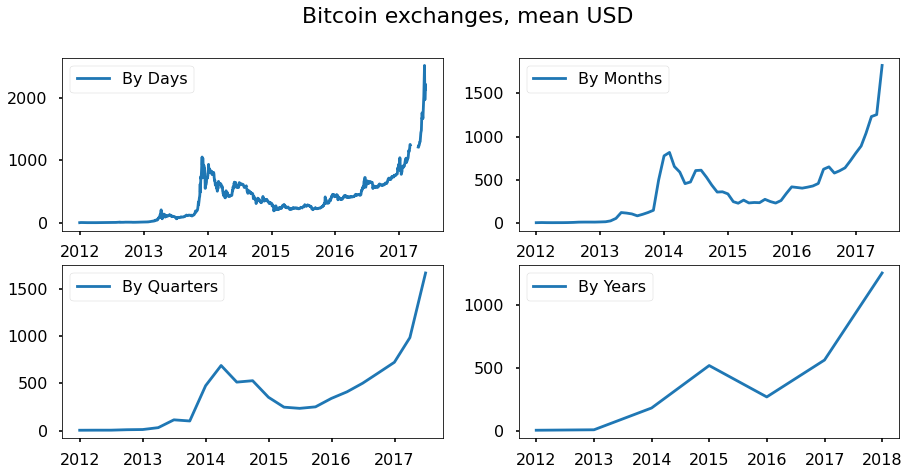

In [32]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

Dickey–Fuller test: p=0.997760


<Figure size 1080x504 with 0 Axes>

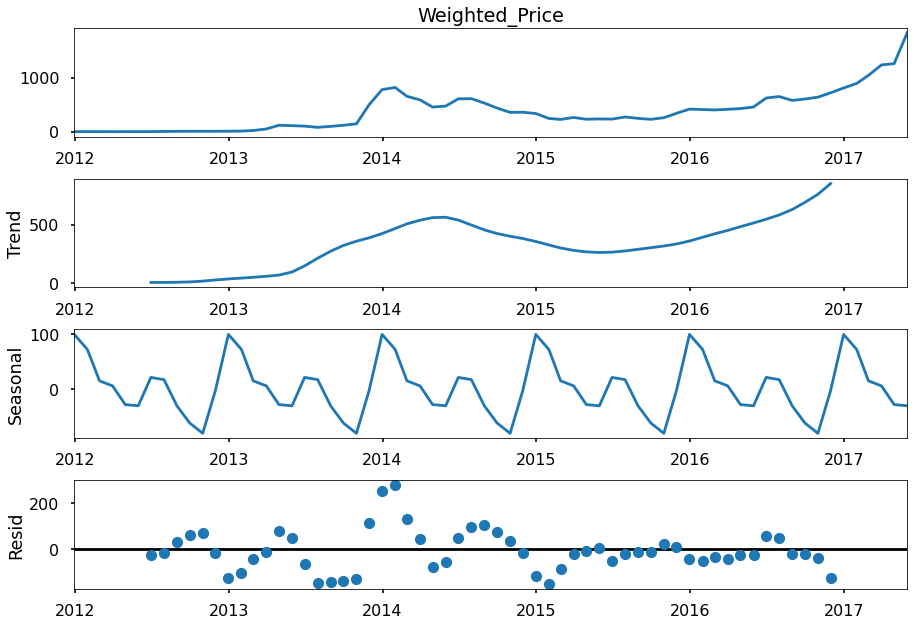

In [5]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])
plt.show()

In [6]:
# Box-Cox Transformations
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

Dickey–Fuller test: p=0.997760


In [7]:
# Seasonal differentiation
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.137240


In [8]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

Dickey–Fuller test: p=0.014538


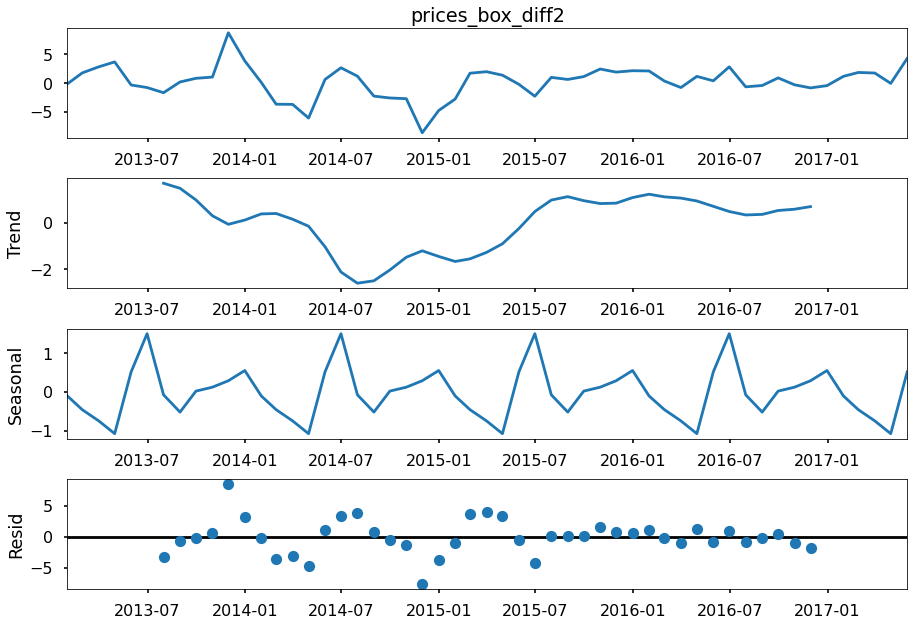

In [9]:
# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])
plt.show()

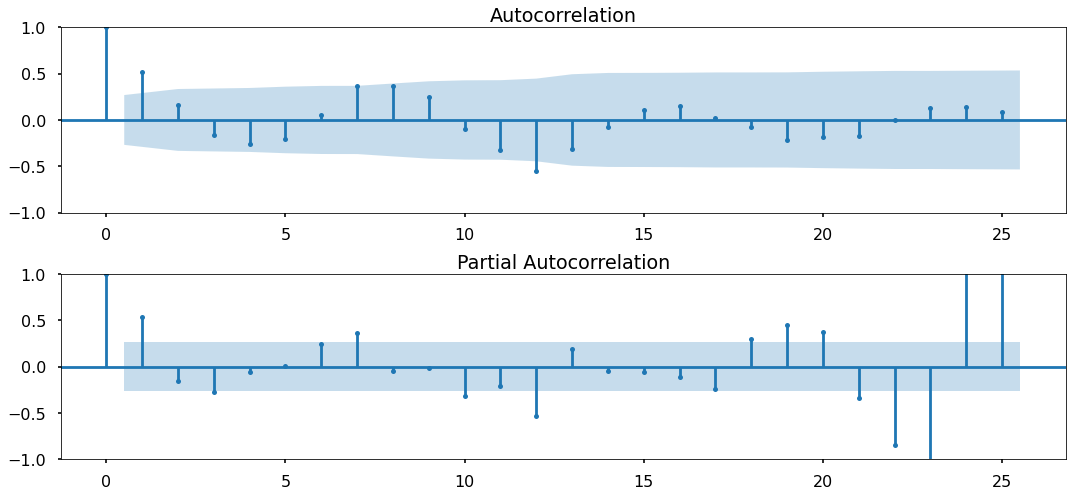

In [10]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags=25, ax=ax)
ax = plt.subplot(212)
plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags=25, ax=ax)
plt.tight_layout()
plt.show()

In [11]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [12]:
# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [13]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
22  (1, 0, 2, 0)  220.331984
21  (1, 0, 1, 1)  220.386074
19  (1, 0, 0, 1)  220.741634
20  (1, 0, 1, 0)  221.262544
13  (0, 2, 0, 1)  221.834692
                                     SARIMAX Results                                      
Dep. Variable:                 Weighted_Price_box   No. Observations:                   66
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -106.166
Date:                            Fri, 15 Jul 2022   AIC                            220.332
Time:                                    22:46:38   BIC                            228.213
Sample:                                12-31-2011   HQIC                           223.363
                                     - 05-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

Dickey–Fuller test:: p=0.000000


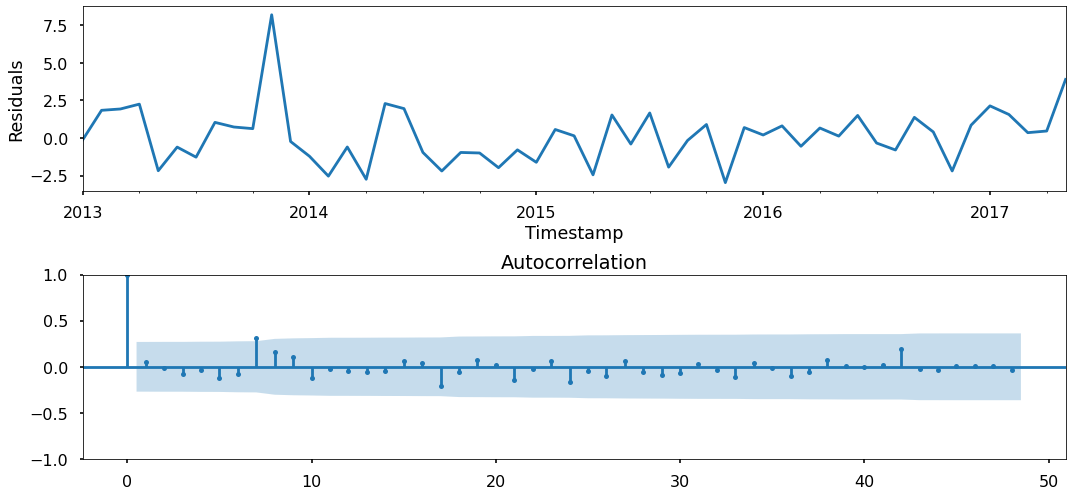

In [14]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [15]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

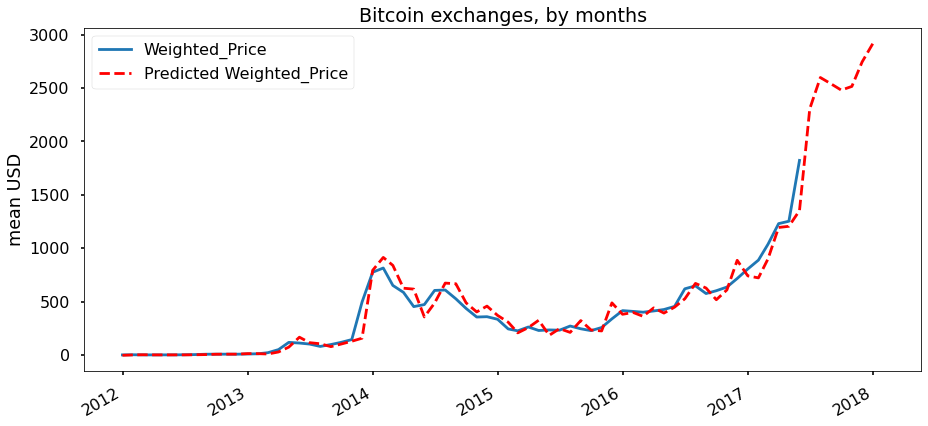

In [16]:
# Prediction
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
             datetime(2018, 1, 28)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()
